In [1]:
from qiskit import*


In [2]:
circ = QuantumCircuit(5,5)

In [3]:
circ.h(0)

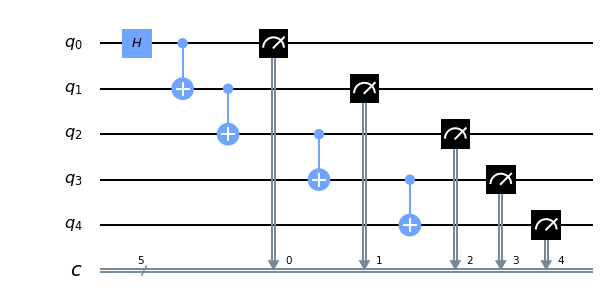

In [33]:
circ = QuantumCircuit(5, 5)
# circ.x(0)
# circ.x(1)
# circ.x(2)
# circ.x(3)
# circ.x(4)
circ.h(0)
for i in range(0,4):
        circ.cx(i,i+1)
for i in range(5):
    circ.measure(i,i)
circ.draw(output='mpl')
    


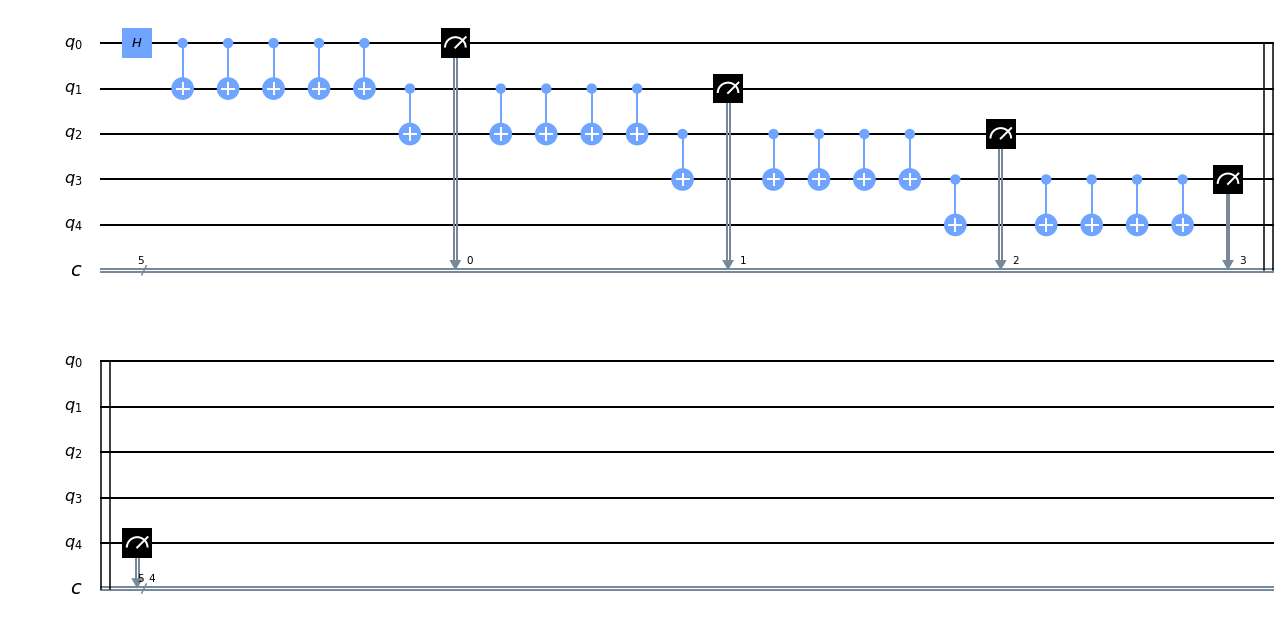

In [34]:
circ_sc = QuantumCircuit(5,5)
# circ_sc.x(0)
# circ_sc.x(1)
# circ_sc.x(2)
# circ_sc.x(3)
# circ_sc.x(4)
circ_sc.h(0)

for i in range(0,4):
        circ_sc.cx(i,i+1)
        circ_sc.cx(i,i+1)
        circ_sc.cx(i,i+1)
        circ_sc.cx(i,i+1)
        circ_sc.cx(i,i+1)
for i in range(5):
    circ_sc.measure(i,i)
circ_sc.draw(output='mpl')

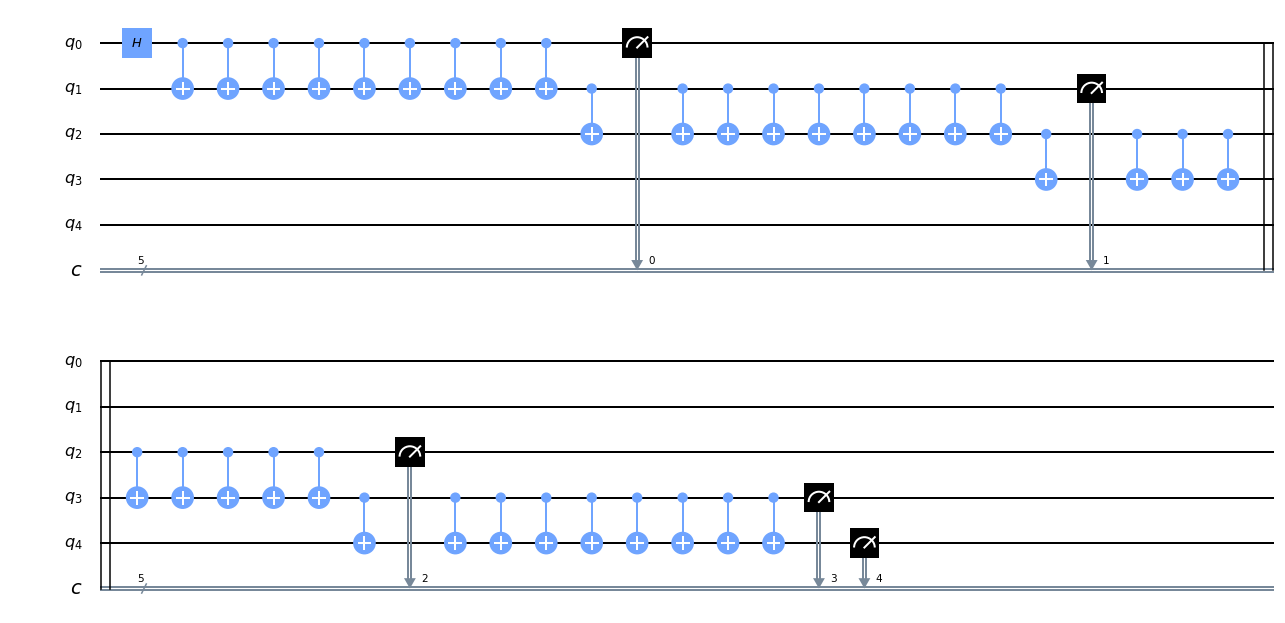

In [35]:
circ_scsc = QuantumCircuit(5,5)
# circ_sc.x(0)
# circ_sc.x(1)
# circ_sc.x(2)
# circ_sc.x(3)
# circ_sc.x(4)
circ_scsc.h(0)

for i in range(0,4):
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
        circ_scsc.cx(i,i+1)
for i in range(5):
    circ_scsc.measure(i,i)
circ_scsc.draw(output='mpl')

In [67]:
#load IBMQ account
#IBMQ.save_account('yourAPItoken')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx2')

ibmqfactory.load_account:WARNING:2020-06-19 09:10:59,859: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

Job Status: job has successfully run
{'01101': 4, '10110': 16, '10001': 4, '00001': 79, '01110': 5, '11100': 71, '11011': 24, '00110': 60, '11000': 93, '11111': 380, '01000': 53, '00100': 29, '11010': 8, '00101': 16, '11101': 52, '00000': 808, '10011': 5, '01010': 2, '10111': 49, '11110': 86, '11001': 39, '00010': 18, '10010': 8, '00011': 30, '01111': 18, '10100': 9, '10101': 10, '00111': 24, '01001': 8, '01100': 7, '10000': 23, '01011': 10}
Job Status: job has successfully run
{'01101': 5, '10110': 13, '10001': 3, '00001': 34, '01110': 16, '11100': 91, '11011': 69, '00110': 9, '11000': 102, '11111': 363, '01000': 24, '00100': 68, '11010': 13, '00101': 4, '11101': 27, '00000': 783, '10011': 13, '01010': 1, '10111': 29, '11110': 40, '11001': 5, '00010': 15, '10010': 3, '00011': 82, '01111': 47, '10100': 38, '10101': 1, '00111': 63, '01001': 3, '01100': 21, '10000': 48, '01011': 15}
Job Status: job has successfully run
{'01101': 7, '10110': 17, '10001': 8, '00001': 54, '01110': 13, '1110

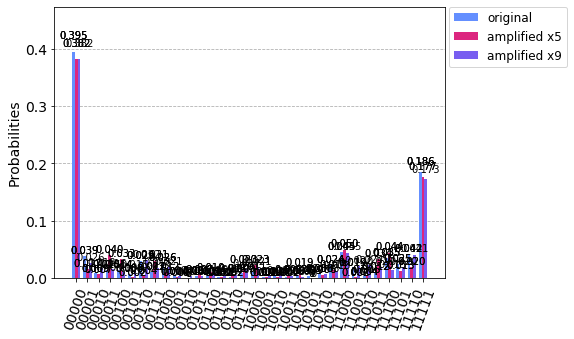

In [36]:
from qiskit.tools.monitor import job_monitor
#running these circuits on IBM BUrlington
simulator= Aer.get_backend('qasm_simulator')
counts =[]
for circy in [circ, circ_sc, circ_scsc]:
    job = execute(circy, backend, shots = 2048)
    job_monitor(job)
    result = job.result()
    print(result.get_counts())
    counts.append(result.get_counts())

#plotting results 
from qiskit.visualization import plot_histogram
plot_histogram(counts, legend = ['original', 'amplified x5', 'amplified x9'])

In [17]:
counts

[{'00000': 8192}, {'00000': 8192}]

In [50]:
import re
qs = circ.qasm()
print(qs.splitlines())

['OPENQASM 2.0;', 'include "qelib1.inc";', 'qreg q[5];', 'creg c[5];', 'h q[0];', 'cx q[0],q[1];', 'cx q[1],q[2];', 'cx q[2],q[3];', 'cx q[3],q[4];', 'measure q[0] -> c[0];', 'measure q[1] -> c[1];', 'measure q[2] -> c[2];', 'measure q[3] -> c[3];', 'measure q[4] -> c[4];']


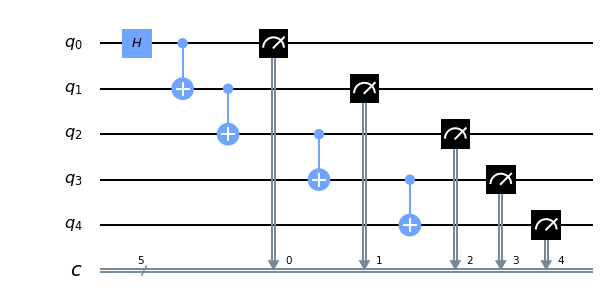

In [55]:
circ.draw(output ='mpl')

In [60]:
def addCXerror(circ, c): 
    '''
    Input: Scale factor and circuit 
    Output: Circuit with scaled noise
    '''
    newqasm_str=""
    qs=circ.qasm()
    qregname=circ.qregs[0].name
    for line in iter(qs.splitlines()):
        if line.startswith('cx'):
            ## Find the number of the control and the target qubit
            search_results = re.finditer(r'\[.*?\]', line)
            count=0
            for item in search_results:
                if count==0:
                    control_ind=int(item.group(0).lstrip('[').rstrip(']'))
                else:
                    target_ind=int(item.group(0).lstrip('[').rstrip(']'))
                count+=1

            newqasm_str+=line+"\n"

            ## increase the error rate of a cx gate
            for i in range(1,c):
                newqasm_str+="cx"+" "+qregname+"["+str(control_ind)+"],"+qregname+"["+str(target_ind)+"];\n"

        else:
            newqasm_str+=line+"\n"
    circo=QuantumCircuit().from_qasm_str(newqasm_str)
    return circo

In [62]:
#Randomized Benchmarked circuits 
#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb
#Generate RB circuits (2Q RB)

#number of qubits
nQ=5 
n_seeds = 3
rb_opts = {}
#Number of Cliffords in the sequence
rb_opts['length_vector'] = [1, 10, 20, 30, 40 , 50]
#Number of seeds (random sequences)
rb_opts['nseeds'] = n_seeds
#Default pattern
rb_opts['rb_pattern'] = [[0, 1]]

#basis gates 
rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)

In [64]:
#scaling circuits 
scaled_circuits = []
for c in [1,3,5,9]:
    for seed in rb_circs: 
        new_seed =[]
        for circ in seed: 
            scaled_circ = addCXerror(circ, c)
            new_seed.append(scaled_circ)
        scaled_circuits.append(new_seed)


In [68]:
#noise model 
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [69]:
#running all the circuits 
from qiskit.tools.monitor import job_monitor
probs = []
s = 1
for seed in scaled_circuits: 
    print('Experimenting with seed' + str(s))
    prob = []
    for circ in seed:
        job = execute(circ, simulator,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots = 1024)
        job_monitor(job)
        result = job.result()
        counts = result.get_counts()
        prob.append(((counts['00'])/1024))
    probs.append(prob)
    s+=1


Experimenting with seed1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Experimenting with seed2
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Experimenting with seed3
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Experimenting with seed4
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Experimentin

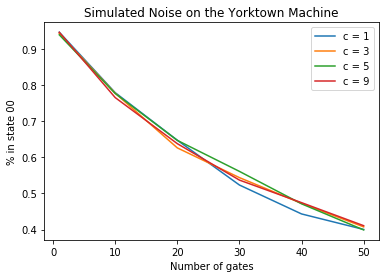

In [72]:
#averge out results 
scale_probs = []
for num_scaler in range(4): 
    gate_probs = []
    for num_gates in range(6):
        probability = 0
        for num_seeds in range(n_seeds): 
            probability += probs[num_scaler*n_seeds +num_seeds][num_gates]
        probability = probability/n_seeds
        gate_probs.append(probability)
    scale_probs.append(gate_probs)
#plotting the results
import matplotlib.pyplot as plt
c = [1,2,3]
gates = [1, 10, 20, 30, 40 , 50]
plt.plot(gates, scale_probs[0], label = 'c = 1')
plt.plot(gates, scale_probs[1], label = 'c = 3')
plt.plot(gates, scale_probs[2], label = 'c = 5')
plt.plot(gates, scale_probs[3], label = 'c = 9')

plt.xlabel('Number of gates')
plt.ylabel('% in state 00')
plt.title('Simulated Noise on the Yorktown Machine')
plt.legend()
plt.show()

In [71]:
scale_probs

[[0.9466145833333334,
  0.779296875,
  0.6474609375,
  0.5234375,
  0.443359375,
  0.400390625],
 [0.9430338541666666,
  0.7776692708333334,
  0.6263020833333334,
  0.5439453125,
  0.47265625,
  0.4075520833333333],
 [0.939453125,
  0.7770182291666666,
  0.6471354166666666,
  0.5611979166666666,
  0.4713541666666667,
  0.3990885416666667],
 [0.9466145833333334,
  0.765625,
  0.6380208333333334,
  0.537109375,
  0.474609375,
  0.4108072916666667]]

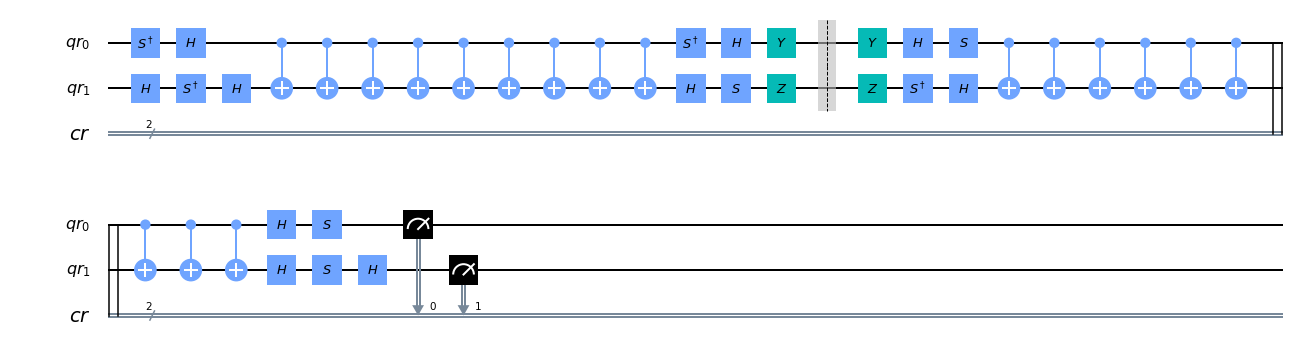

In [79]:
scaled_circuits[9][0].draw(output='mpl')